# 붓꽃의 품종 분류하기

In [62]:
import pandas as pd

In [63]:
iris=pd.read_csv('../Data/iris.csv')

In [64]:
iris['color'] = \
['red' if name == 'Iris-setosa' else 'green' if name == 'Iris-versicolor' else 'blue' for name in iris['Name']] 

In [65]:
iris.loc[iris['Name'] == 'Iris-setosa',['color']] = 'red'
iris.loc[iris['Name'] == 'Iris-versicolor',['color']] = 'green'
iris.loc[iris['Name'] == 'Iris-virginia',['color']] = 'blue'
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,blue
146,6.3,2.5,5.0,1.9,Iris-virginica,blue
147,6.5,3.0,5.2,2.0,Iris-virginica,blue
148,6.2,3.4,5.4,2.3,Iris-virginica,blue


In [66]:
# Scatter
import matplotlib.pyplot as plt

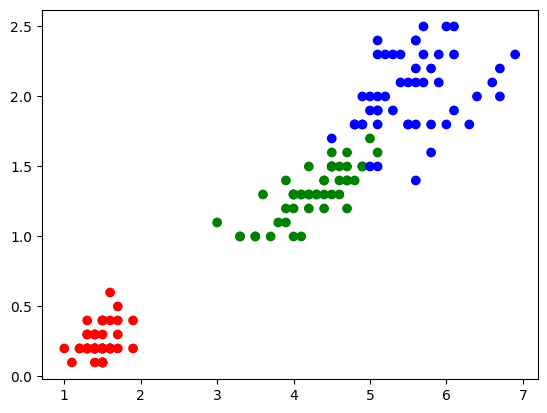

In [67]:
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c = iris['color']
)

plt.show()

In [68]:
# 머신러닝을 위한 작업
data = iris.iloc[:,:4]
target = iris.iloc[:,4]

In [69]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics

In [70]:
X_train, X_test ,y_train, y_test = train_test_split(data,target)

In [71]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [72]:
pred=clf.predict(X_test)
pred_train=clf.predict(X_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9732142857142857
0.9736842105263158


In [73]:
print(metrics.classification_report(y_test, pred))
print(metrics.classification_report(y_train, pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       0.97      0.95      0.96        38
 Iris-virginica       0.95      0.97      0.96        38

       accuracy                           0.97       112
      macro avg       0.97      0.97      0.97       112
   weighted avg       0.97      0.97      0.97       112



In [74]:
print(metrics.precision_score(y_test,pred,average=None))
print(metrics.recall_score(y_test,pred,average=None))
print(metrics.f1_score(y_test,pred,average=None))

[1.         0.92307692 1.        ]
[1.         1.         0.91666667]
[1.         0.96       0.95652174]


---
### 분류 Report 이해하기
번호 : [1,2,3,4,5,6] <br><br>
정답 : [음치, 음치, 음치, 음치, 정상, 정상] <br><br>
예측 : [음치, 음치, 정상, 정상, 정상, 정상] <br><br>

- 정확도 : 4 / 6 = 0.66 <br><br>
- 정밀도 : 음치라고 예측한 사람들 주에서 진짜 음치가 얼마나 있는가? <br><br>
    - 음치 정밀도 1 / 정상 정밀도 0.5 <br><br>
- 재현율 : 전체 음치 중에서 내가 맞춘 음치의 비율? <br><br>
    - 음치 재현율 0.5 / 정상 재현율 1 <br><br>
- F1 score : 정밀도와 재현율의 조화 평균 <br><br>
    - 음치 F1 score : 0.66 / 정상 F1 score : 0.66

<br>

- 음치라고 예측했을 때 TP : 2
- 음치라고 예측했을 때 TN : 2
- 음치라고 예측했을 때 FP : 0 
- 음치라고 예측했을 때 FN : 2 

- 정상이라고 예측했을 때 TP : 2
- 정상이라고 예측했을 때 TN : 0 
- 정상이라고 예측했을 때 FP : 2 
- 정상이라고 예측했을 때 FN : 2 

In [75]:
import numpy as np

In [76]:
y = np.array([1,1,1,1,0,0])
p = np.array([1,1,0,0,0,0])

np.zeros(shape=(2,2))

            

array([[0., 0.],
       [0., 0.]])

In [77]:
# 정확도
np.mean(np.equal(y,p))

0.6666666666666666

In [78]:
# 음치 맞출 정밀도
precision=np.sum(y * p == 1) / np.sum(p)
precision

1.0

In [79]:
# 음치 맞출 재현율
recall=np.sum(y * p == 1) / np.sum(y)
recall

0.5

In [80]:
# fl score
f1 = 2 * precision * recall / (precision + recall)
f1

0.6666666666666666

In [81]:
# 한번에 하기
print('accuracy : ', metrics.accuracy_score(y,p))
print('precision : ', metrics.precision_score(y,p))
print('recall : ', metrics.recall_score(y,p))
print('f1 score : ', metrics.f1_score(y,p))

accuracy :  0.6666666666666666
precision :  1.0
recall :  0.5
f1 score :  0.6666666666666666


In [82]:
# 정상 정밀도
np.sum((y == 0) & (p == 0)) / np.sum(p == 0)

0.5

In [83]:
# 정상 재현율
np.sum((y == 0) & (p == 0)) / np.sum(y == 0)

1.0